#Loan Default Analysis

Dataset had been taken from Kaggle : https://www.kaggle.com/datasets/yasserh/loan-default-dataset

##Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "D:\Download\Loan_Default.csv"
df = pd.read_csv(path)

In [3]:
df.shape

(148670, 34)

In [4]:
pd.set_option("display.max_columns", df.shape[-1])     ##display all columns
df.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

In [7]:
df.dtypes

id                             int64
year                           int64
loan_limit                    object
gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
credit_worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
interest_rate_spread         float64
upfront_charges              float64
term                         float64
neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
secured_by                    object
total_units                   object
income                       float64
credit_type                   object
credit_score                   int64
co-applicant_credit_type      object
a

In [8]:
df.describe()

,id,year,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


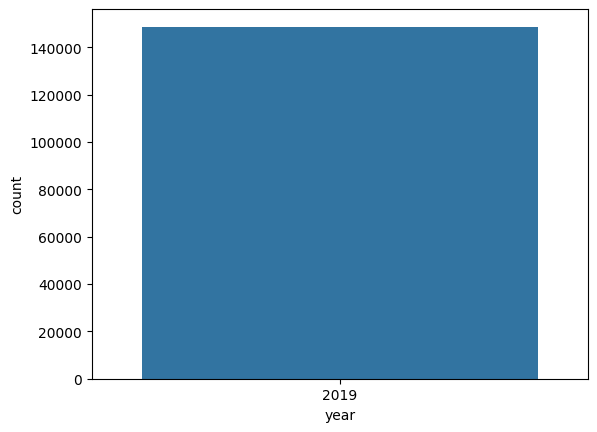

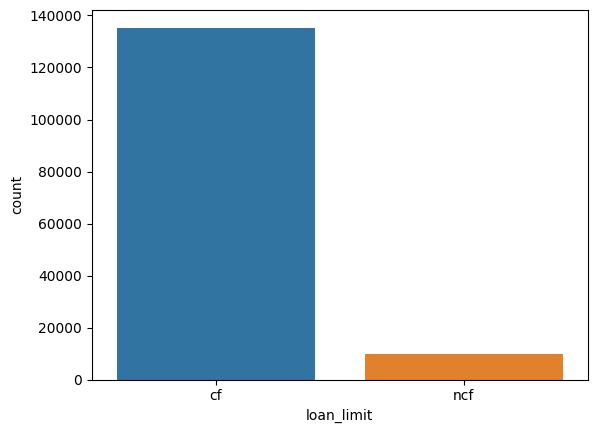

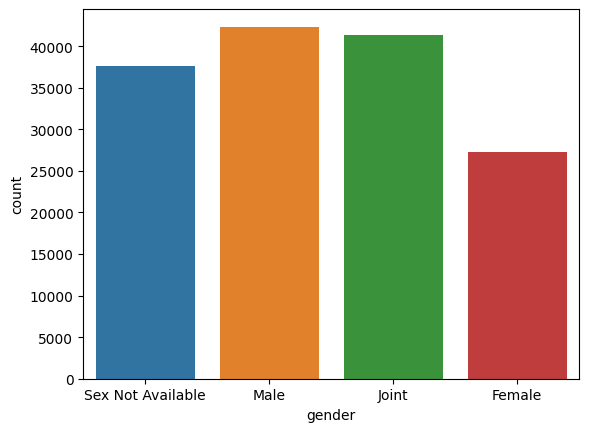

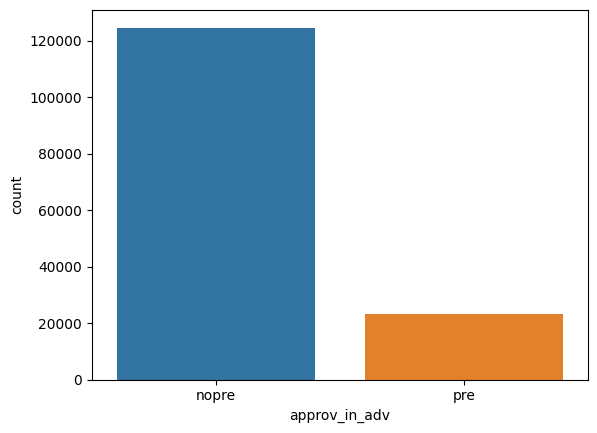

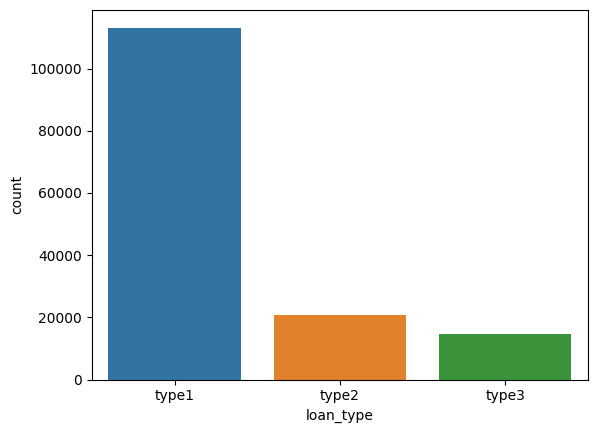

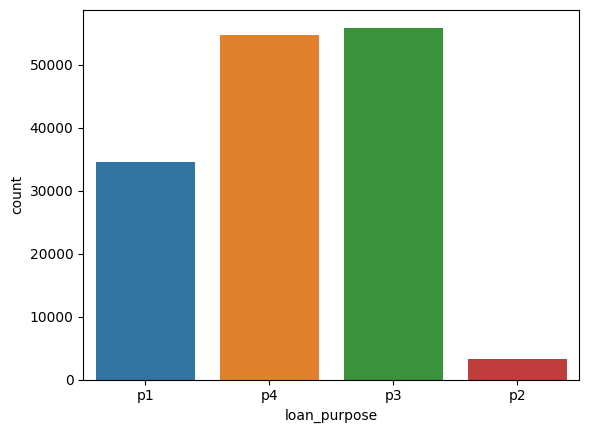

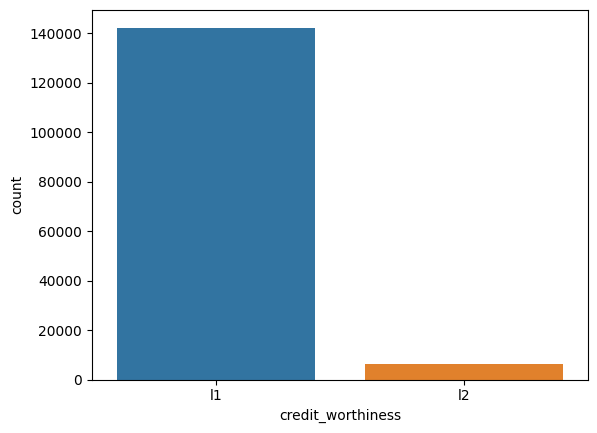

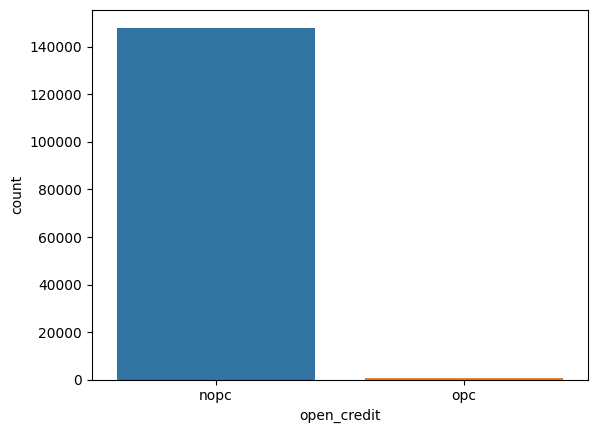

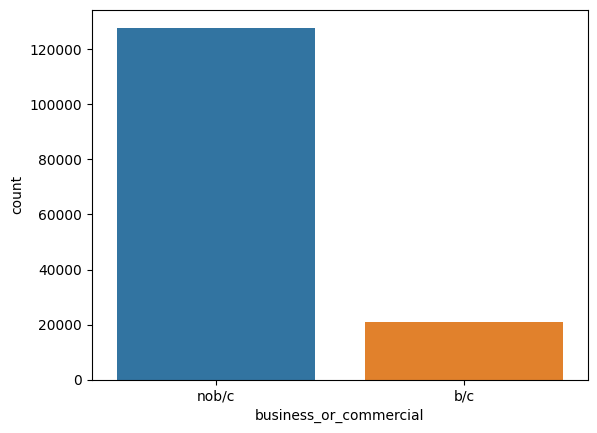

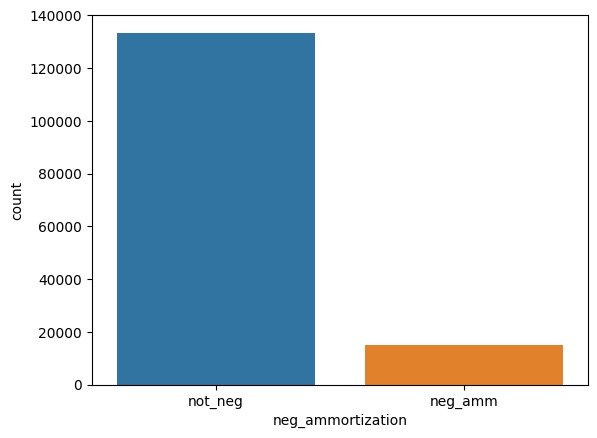

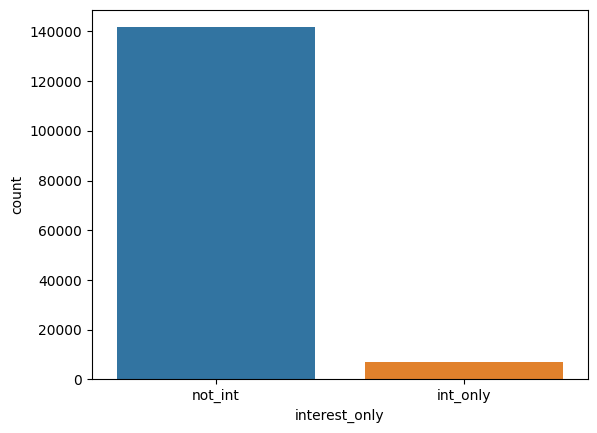

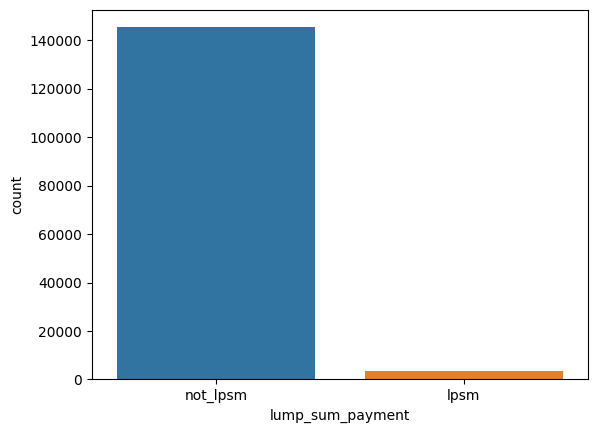

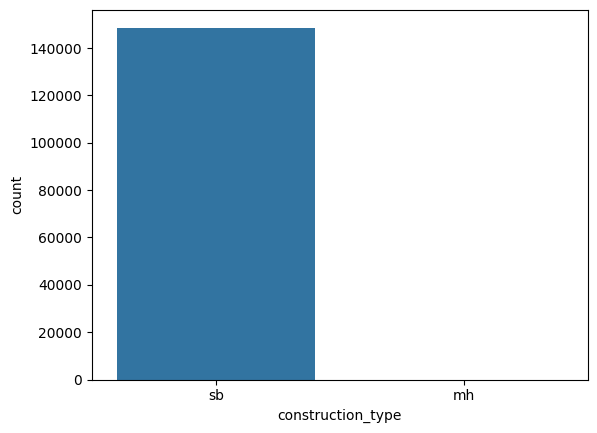

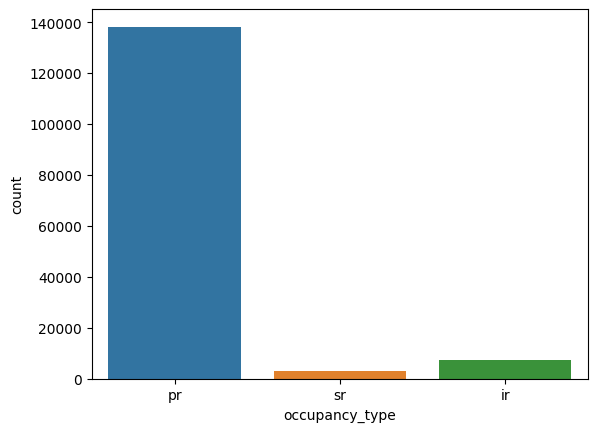

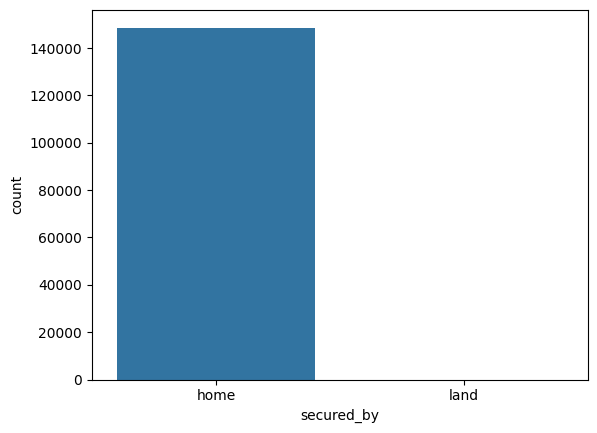

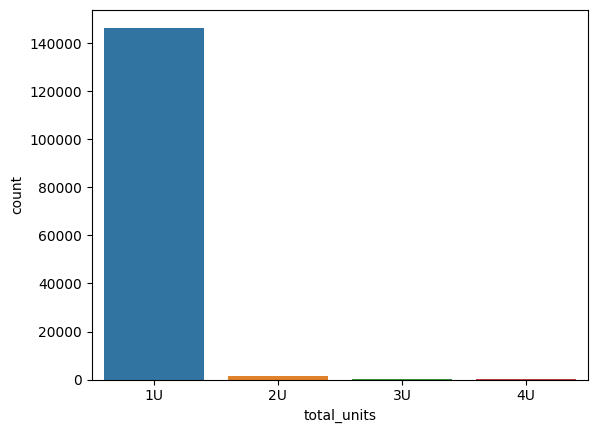

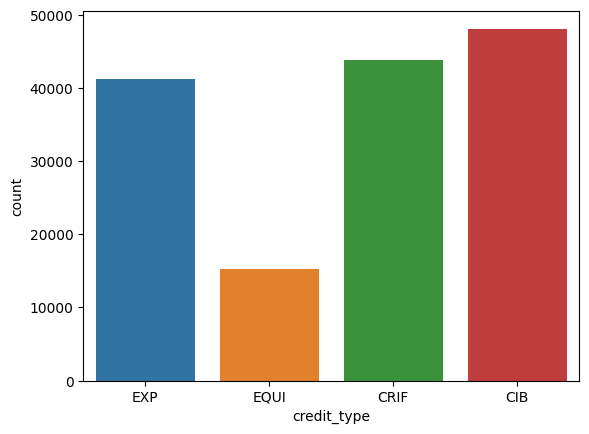

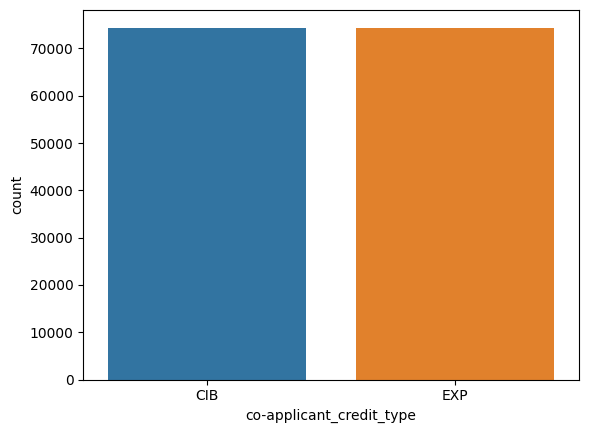

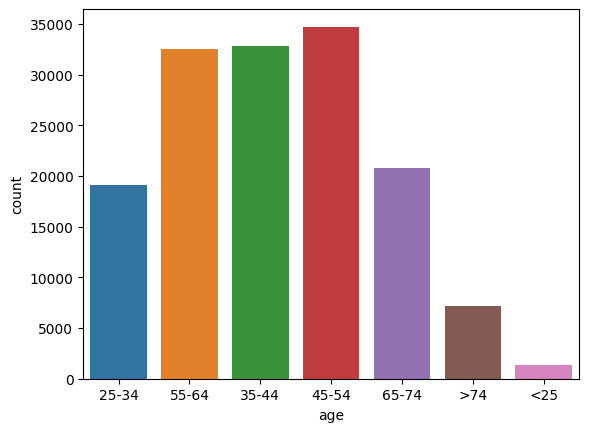

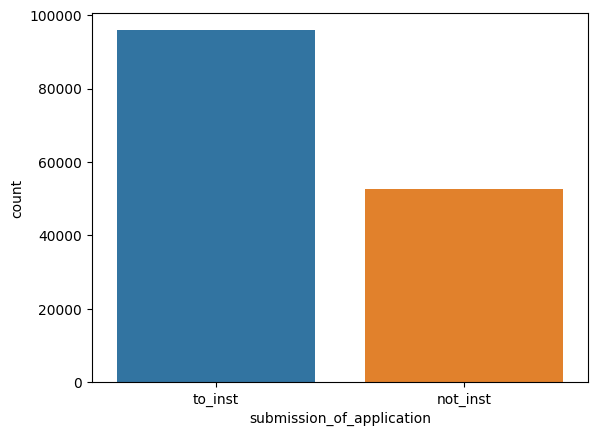

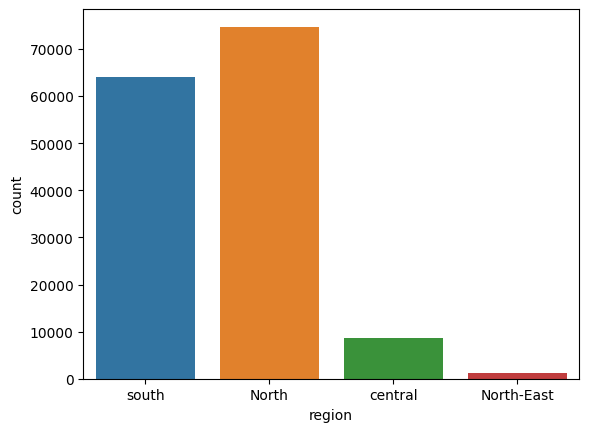

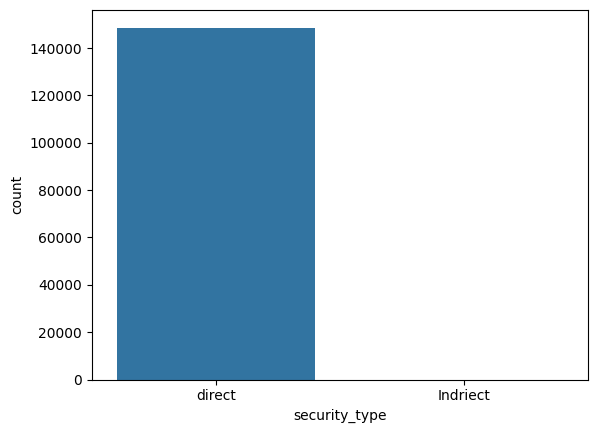

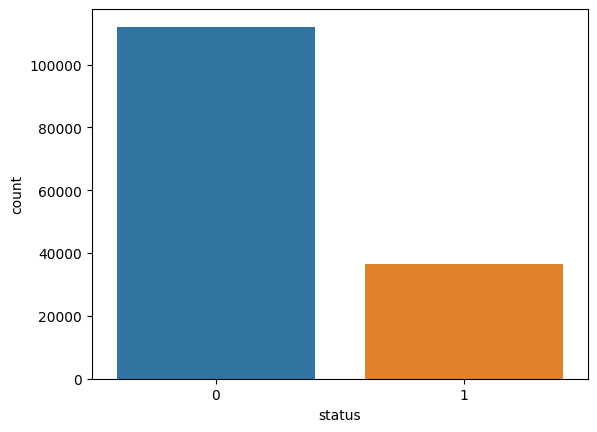

In [9]:
col = ['year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'business_or_commercial', 'neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'secured_by', 'total_units', 'credit_type',  'co-applicant_credit_type', 'age', 'submission_of_application', 'region', 'security_type', 'status', ]

for i in range(len(col)):
  sns.countplot(data=df, x=col[i])
  plt.show()

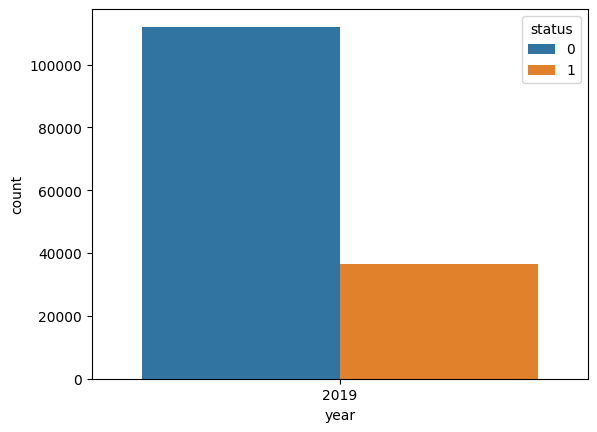

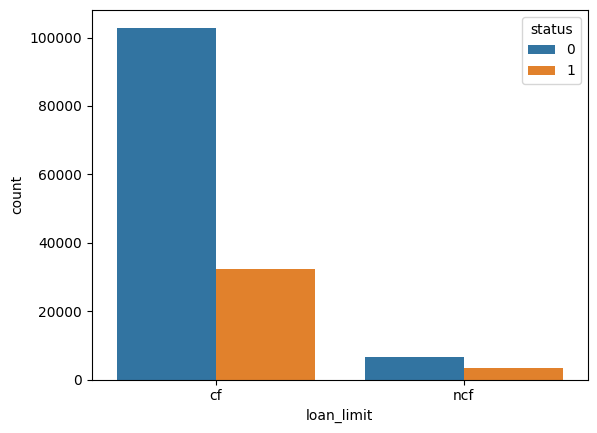

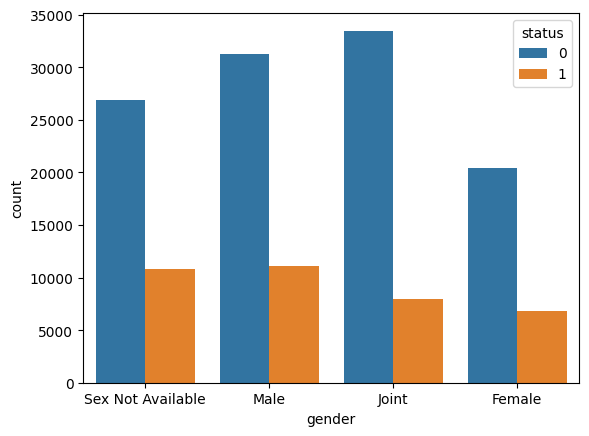

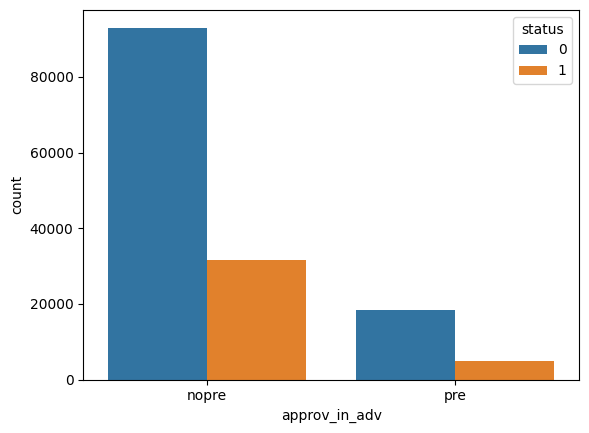

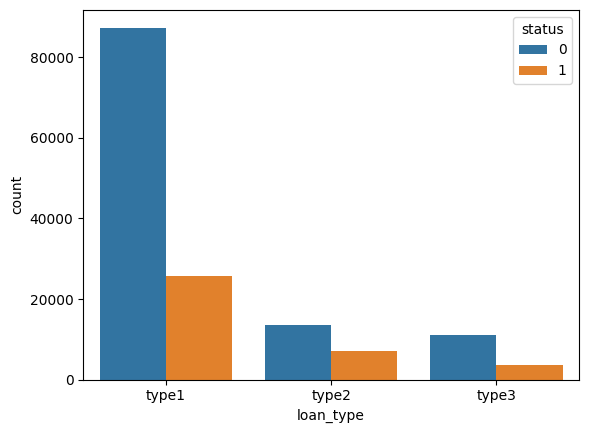

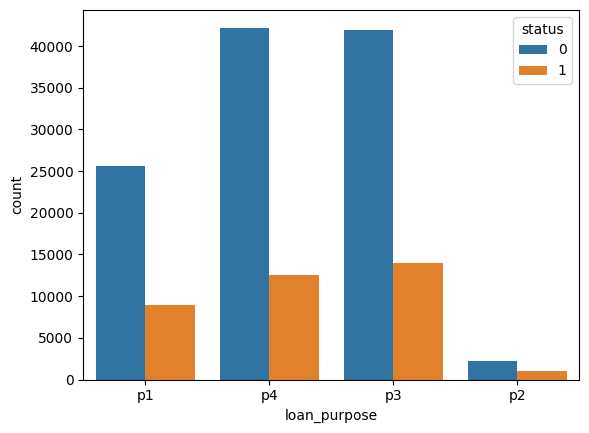

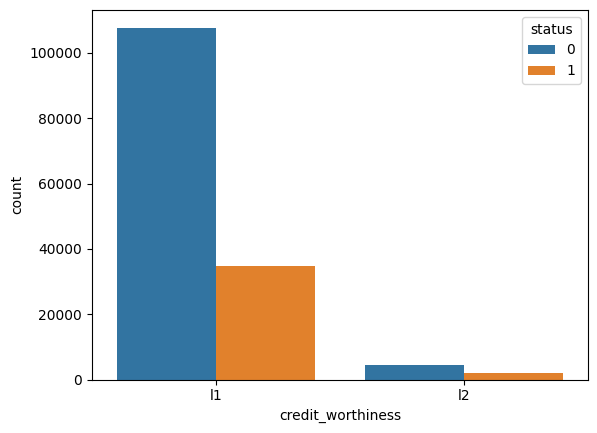

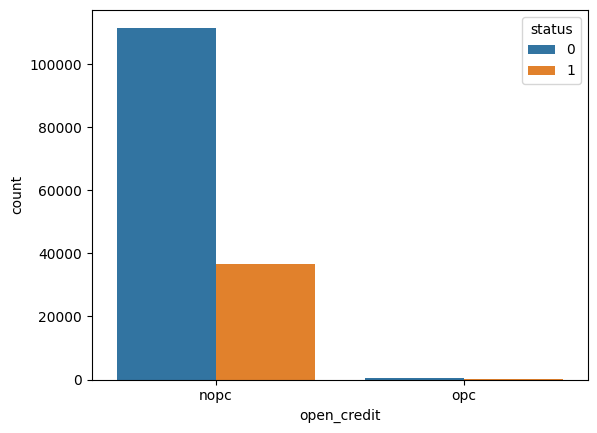

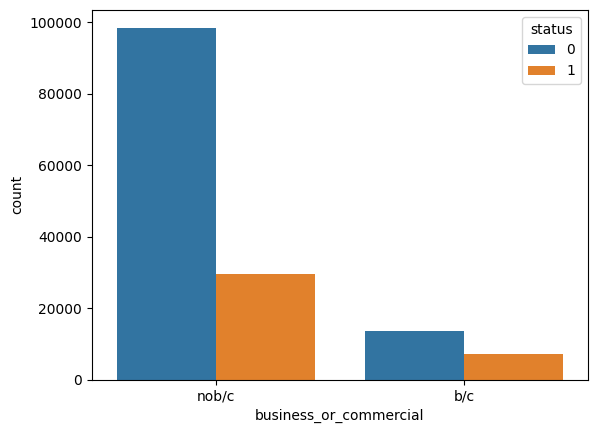

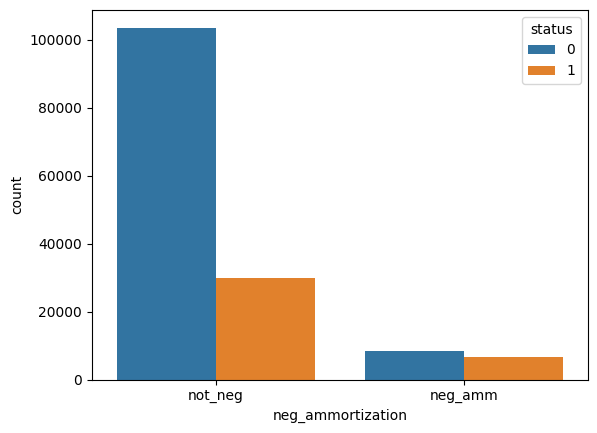

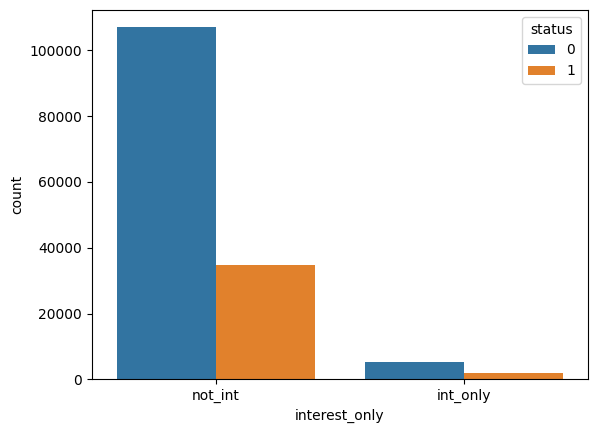

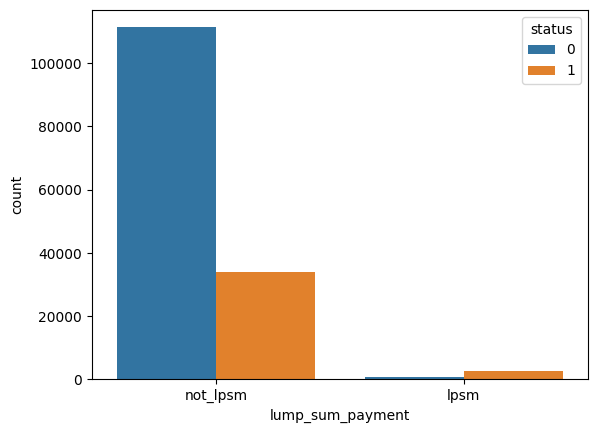

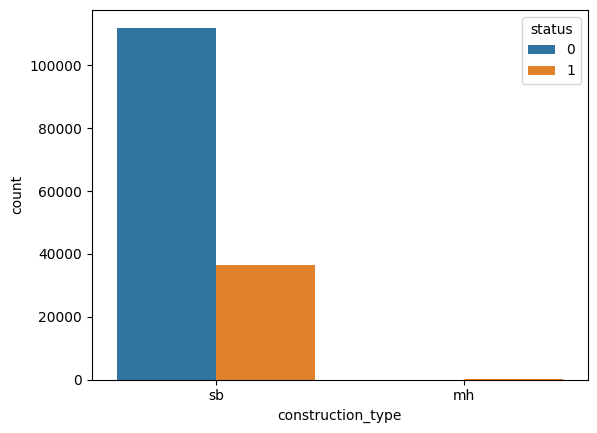

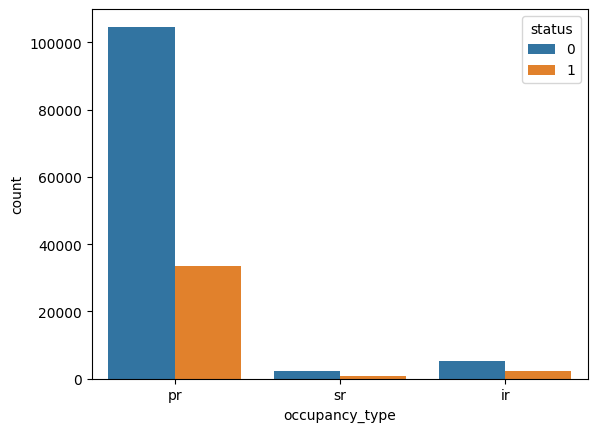

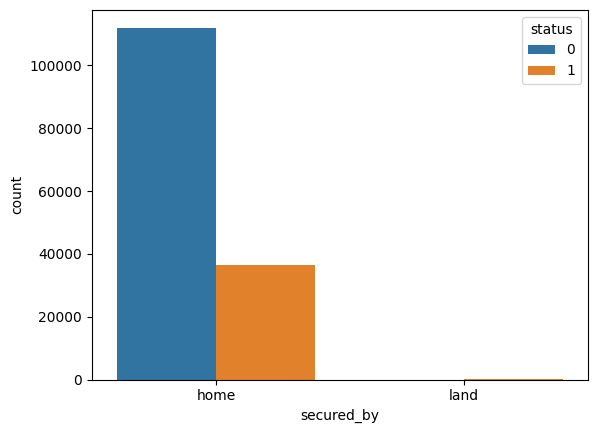

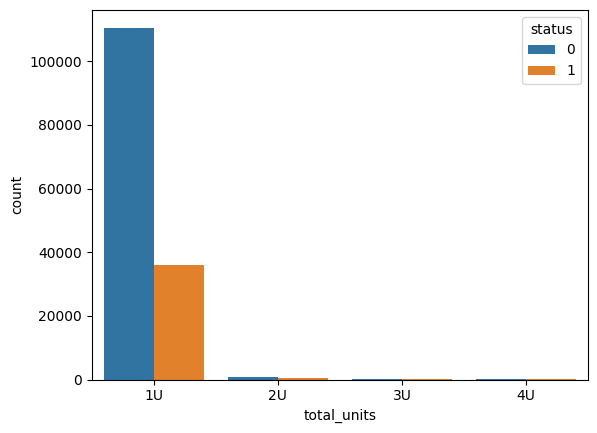

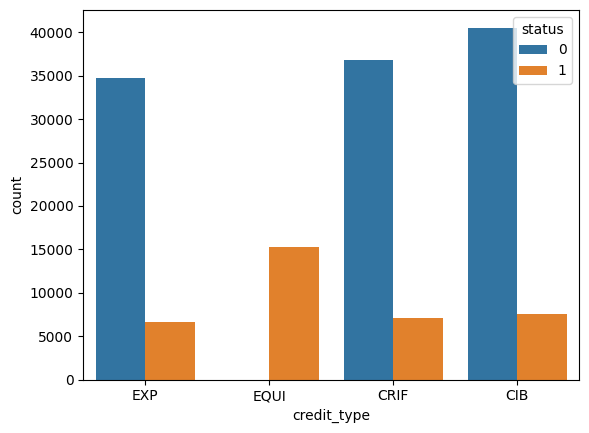

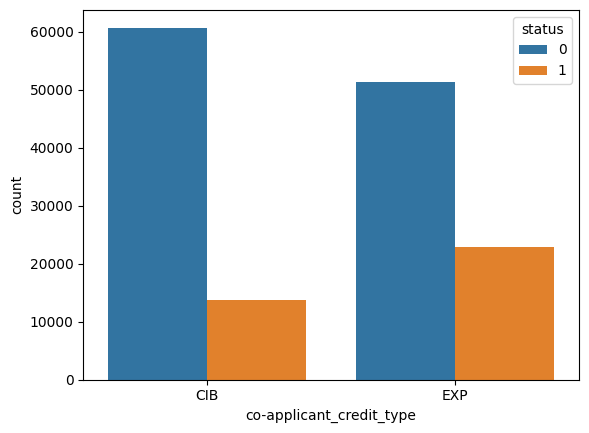

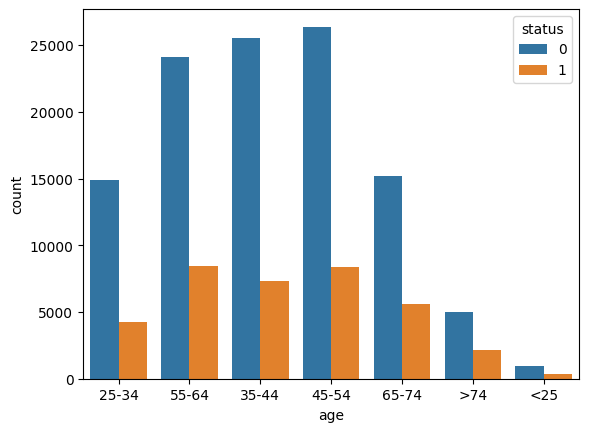

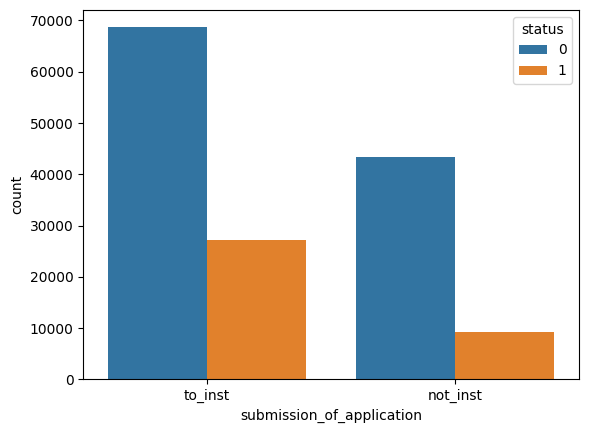

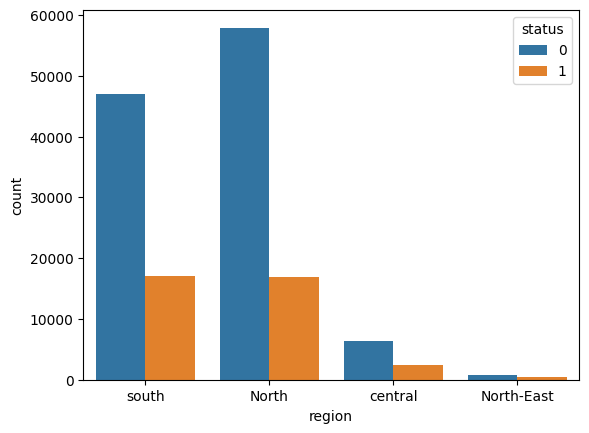

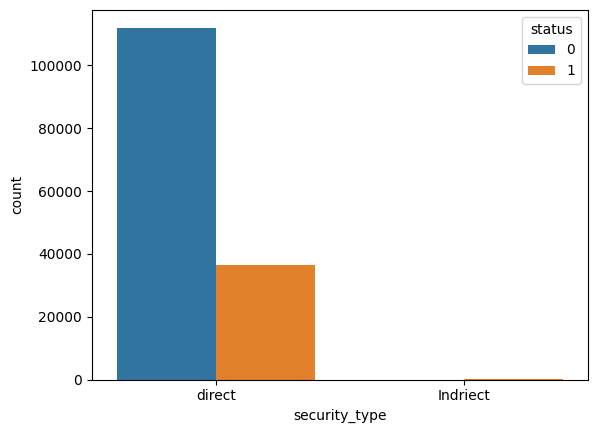

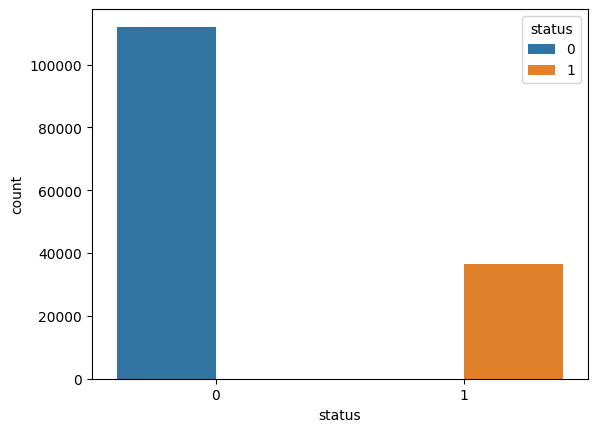

In [10]:
col = ['year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'business_or_commercial', 'neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'secured_by', 'total_units', 'credit_type',  'co-applicant_credit_type', 'age', 'submission_of_application', 'region', 'security_type', 'status', ]

for i in range(len(col)):
  sns.countplot(data=df, x=col[i], hue="status")
  plt.show()

In [11]:
colg = ['year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'business_or_commercial', 'neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'secured_by', 'total_units', 'credit_type',  'co-applicant_credit_type', 'age', 'submission_of_application', 'region', 'security_type', 'status', ]
for i in range(len(colg)):
  print(df[colg[i]].value_counts())
  print('\n')

2019    148670
Name: year, dtype: int64


cf     135348
ncf      9978
Name: loan_limit, dtype: int64


Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: gender, dtype: int64


nopre    124621
pre       23141
Name: approv_in_adv, dtype: int64


type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64


p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64


l1    142344
l2      6326
Name: credit_worthiness, dtype: int64


nopc    148114
opc        556
Name: open_credit, dtype: int64


nob/c    127908
b/c       20762
Name: business_or_commercial, dtype: int64


not_neg    133420
neg_amm     15129
Name: neg_ammortization, dtype: int64


not_int     141560
int_only      7110
Name: interest_only, dtype: int64


not_lpsm    145286
lpsm          3384
Name: lump_sum_payment, dtype: int64


sb    148637
mh        33
Name: construction_type, dtype: int64


pr    138201
ir      7340
sr 

##Feature Selection

In [12]:
features = ['loan_type', 'loan_amount', 'rate_of_interest', 'term', 'property_value', 'income', 'credit_score', 'age', 'status', 'dtir1']
df = df[features]
df

,loan_type,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,status,dtir1
0,type1,116500,NaN,360.0,118000.0,1740.0,758,25-34,1,45.0
1,type2,206500,NaN,360.0,NaN,4980.0,552,55-64,1,NaN
2,type1,406500,4.560,360.0,508000.0,9480.0,834,35-44,0,46.0
3,type1,456500,4.250,360.0,658000.0,11880.0,587,45-54,0,42.0
4,type1,696500,4.000,360.0,758000.0,10440.0,602,25-34,0,39.0
...,...,...,...,...,...,...,...,...,...,...
148665,type1,436500,3.125,180.0,608000.0,7860.0,659,55-64,0,48.0
148666,type1,586500,5.190,360.0,788000.0,7140.0,569,25-34,0,15.0
148667,type1,446500,3.125,180.0,728000.0,6900.0,702,45-54,0,49.0
148668,type1,196500,3.500,180.0,278000.0,7140.0,737,55-64,0,29.0


In [13]:
df.duplicated().sum()

6

In [14]:
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148664 non-null  object 
 1   loan_amount       148664 non-null  int64  
 2   rate_of_interest  112227 non-null  float64
 3   term              148623 non-null  float64
 4   property_value    133568 non-null  float64
 5   income            139518 non-null  float64
 6   credit_score      148664 non-null  int64  
 7   age               148464 non-null  object 
 8   status            148664 non-null  int64  
 9   dtir1             124549 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 12.5+ MB


In [17]:
df.isna().sum()

loan_type               0
loan_amount             0
rate_of_interest    36437
term                   41
property_value      15096
income               9146
credit_score            0
age                   200
status                  0
dtir1               24115
dtype: int64

Replacing NaN values by mean in case of continous-value(int or float) features and by mode/most_frequent(object) in case of categorical features

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[['rate_of_interest', 'term','property_value','income','dtir1']] = imputer.fit_transform(df[['rate_of_interest', 'term','property_value','income','dtir1']])

imputer = SimpleImputer(strategy='most_frequent')
df[['age']] = imputer.fit_transform(df[['age']])

C:\Users\User\AppData\Local\Temp\ipykernel_22352\430645842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['rate_of_interest', 'term','property_value','income','dtir1']] = imputer.fit_transform(df[['rate_of_interest', 'term','property_value','income','dtir1']])
C:\Users\User\AppData\Local\Temp\ipykernel_22352\430645842.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['age']] = imputer.fit_transform(df[['age']])


In [19]:
df.isna().sum()

loan_type           0
loan_amount         0
rate_of_interest    0
term                0
property_value      0
income              0
credit_score        0
age                 0
status              0
dtir1               0
dtype: int64

In [20]:
df.shape

(148664, 10)

In [21]:
df.status.value_counts()

0    112027
1     36637
Name: status, dtype: int64

In [22]:
df

,loan_type,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,status,dtir1
0,type1,116500,4.045482,360.0,118000.000000,1740.0,758,25-34,1,45.000000
1,type2,206500,4.045482,360.0,497900.200647,4980.0,552,55-64,1,37.732932
2,type1,406500,4.560000,360.0,508000.000000,9480.0,834,35-44,0,46.000000
3,type1,456500,4.250000,360.0,658000.000000,11880.0,587,45-54,0,42.000000
4,type1,696500,4.000000,360.0,758000.000000,10440.0,602,25-34,0,39.000000
...,...,...,...,...,...,...,...,...,...,...
148665,type1,436500,3.125000,180.0,608000.000000,7860.0,659,55-64,0,48.000000
148666,type1,586500,5.190000,360.0,788000.000000,7140.0,569,25-34,0,15.000000
148667,type1,446500,3.125000,180.0,728000.000000,6900.0,702,45-54,0,49.000000
148668,type1,196500,3.500000,180.0,278000.000000,7140.0,737,55-64,0,29.000000


In [23]:
df.loan_type.value_counts()

type1    113172
type2     20758
type3     14734
Name: loan_type, dtype: int64

In [24]:
df.age.value_counts()

45-54    34919
35-44    32815
55-64    32533
65-74    20744
25-34    19141
>74       7175
<25       1337
Name: age, dtype: int64

In [25]:
df.status.value_counts()

0    112027
1     36637
Name: status, dtype: int64

##EDA

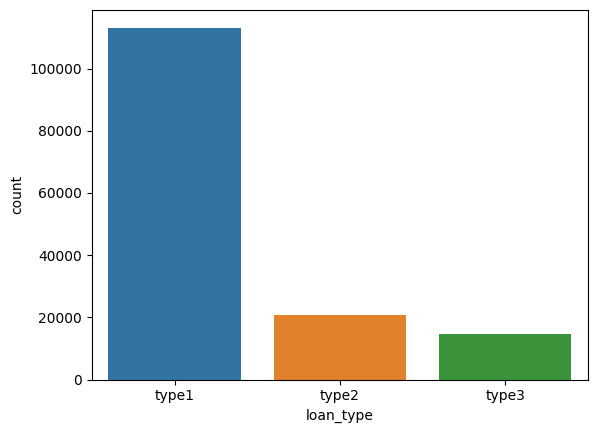

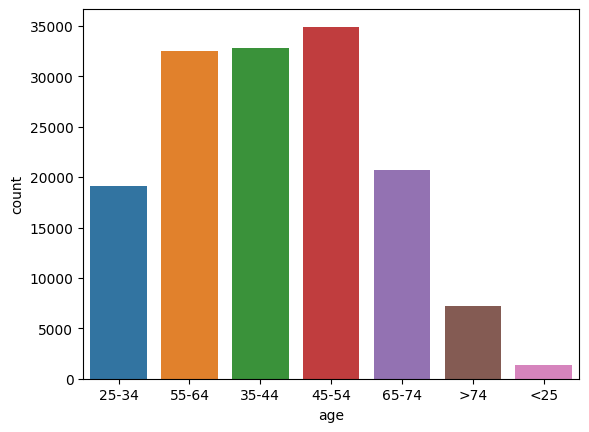

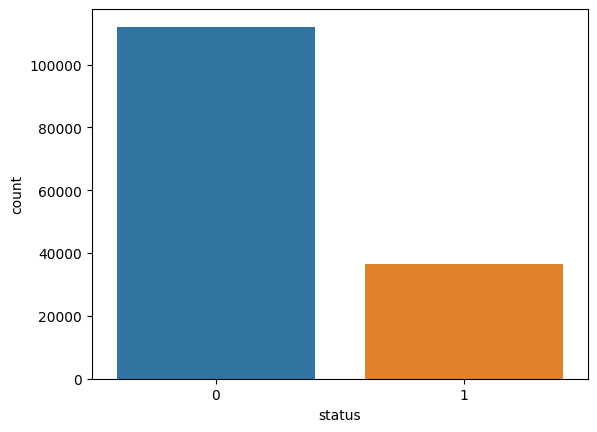

In [26]:
col = ["loan_type", "age", "status"]
for i in range(len(col)):
  sns.countplot(data=df, x=col[i])
  plt.show()

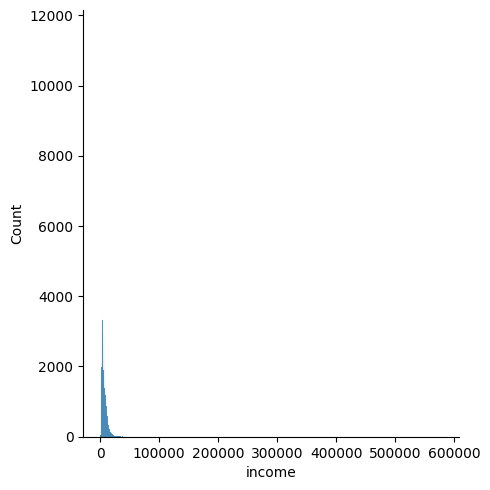

In [27]:
sns.displot(data=df, x="income")
plt.show()

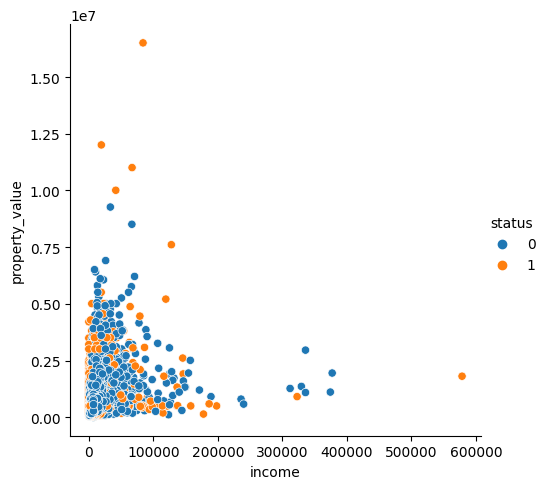

In [28]:
sns.relplot(data=df, x="income", y="property_value", hue="status")
plt.show()

In [29]:
df.loan_type.value_counts()

type1    113172
type2     20758
type3     14734
Name: loan_type, dtype: int64

In [30]:
df.age.value_counts()

45-54    34919
35-44    32815
55-64    32533
65-74    20744
25-34    19141
>74       7175
<25       1337
Name: age, dtype: int64

In [31]:
df.status.value_counts()

0    112027
1     36637
Name: status, dtype: int64

In [32]:
## One-hot encoding
col_to_change = ["loan_type", "age"]
df = pd.get_dummies(df, columns=col_to_change)
df

,loan_amount,rate_of_interest,term,property_value,income,credit_score,status,dtir1,loan_type_type1,loan_type_type2,loan_type_type3,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,4.045482,360.0,118000.000000,1740.0,758,1,45.000000,1,0,0,1,0,0,0,0,0,0
1,206500,4.045482,360.0,497900.200647,4980.0,552,1,37.732932,0,1,0,0,0,0,1,0,0,0
2,406500,4.560000,360.0,508000.000000,9480.0,834,0,46.000000,1,0,0,0,1,0,0,0,0,0
3,456500,4.250000,360.0,658000.000000,11880.0,587,0,42.000000,1,0,0,0,0,1,0,0,0,0
4,696500,4.000000,360.0,758000.000000,10440.0,602,0,39.000000,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,436500,3.125000,180.0,608000.000000,7860.0,659,0,48.000000,1,0,0,0,0,0,1,0,0,0
148666,586500,5.190000,360.0,788000.000000,7140.0,569,0,15.000000,1,0,0,1,0,0,0,0,0,0
148667,446500,3.125000,180.0,728000.000000,6900.0,702,0,49.000000,1,0,0,0,0,1,0,0,0,0
148668,196500,3.500000,180.0,278000.000000,7140.0,737,0,29.000000,1,0,0,0,0,0,1,0,0,0


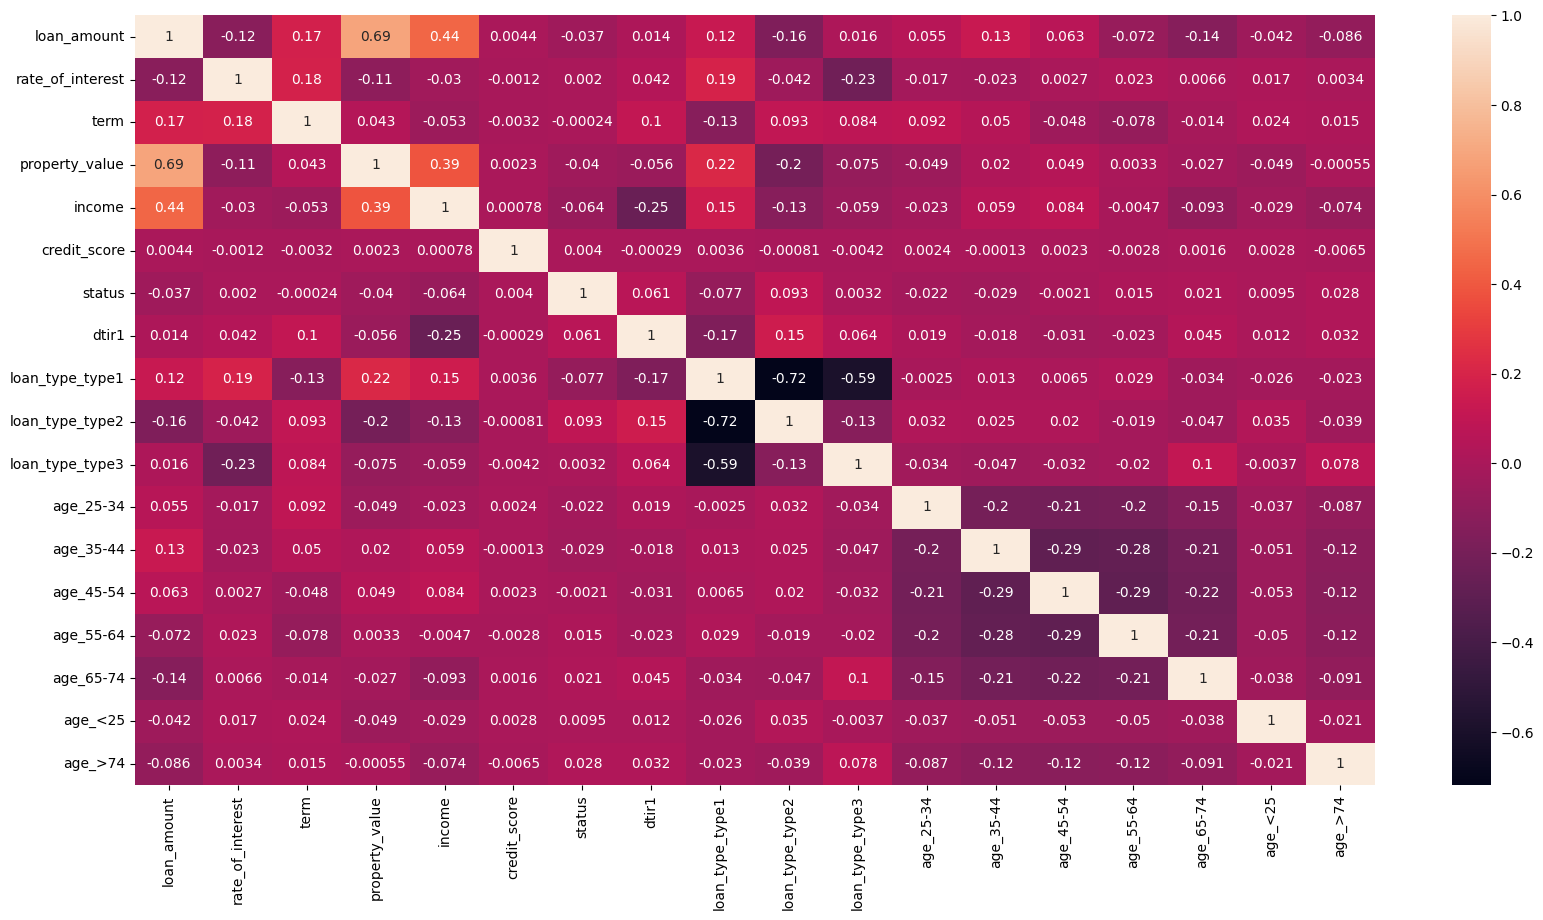

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amount       148664 non-null  int64  
 1   rate_of_interest  148664 non-null  float64
 2   term              148664 non-null  float64
 3   property_value    148664 non-null  float64
 4   income            148664 non-null  float64
 5   credit_score      148664 non-null  int64  
 6   status            148664 non-null  int64  
 7   dtir1             148664 non-null  float64
 8   loan_type_type1   148664 non-null  uint8  
 9   loan_type_type2   148664 non-null  uint8  
 10  loan_type_type3   148664 non-null  uint8  
 11  age_25-34         148664 non-null  uint8  
 12  age_35-44         148664 non-null  uint8  
 13  age_45-54         148664 non-null  uint8  
 14  age_55-64         148664 non-null  uint8  
 15  age_65-74         148664 non-null  uint8  
 16  age_<25           14

In [35]:
df.describe()

,loan_amount,rate_of_interest,term,property_value,income,credit_score,status,dtir1,loan_type_type1,loan_type_type2,loan_type_type3,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
count,1.486640e+05,148664.000000,148664.000000,1.486640e+05,148664.000000,148664.000000,148664.000000,148664.000000,148664.000000,148664.000000,148664.000000,148664.000000,148664.000000,148664.000000,148664.000000,148664.000000,148664.000000,148664.000000
mean,3.311197e+05,4.045482,335.135578,4.979002e+05,6957.392164,699.788214,0.246442,37.732932,0.761260,0.139630,0.099109,0.128753,0.220733,0.234885,0.218836,0.139536,0.008993,0.048263
std,1.839108e+05,0.487772,58.401994,3.411739e+05,6293.593015,115.877017,0.430940,9.652314,0.426315,0.346604,0.298810,0.334928,0.414742,0.423929,0.413458,0.346506,0.094407,0.214323
min,1.650000e+04,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.965000e+05,3.750000,360.000000,2.880000e+05,3840.000000,599.000000,0.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.965000e+05,4.045482,360.000000,4.580000e+05,6000.000000,699.000000,0.000000,37.732932,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.365000e+05,4.250000,360.000000,5.980000e+05,8280.000000,800.000000,0.000000,44.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.576500e+06,8.000000,360.000000,1.650800e+07,578580.000000,900.000000,1.000000,61.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Model

In [36]:
y = df.status
x = df.drop(['status'], axis=1)

In [37]:
print(x.shape,y.shape)

(148664, 17) (148664,)


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(118931, 17) (29733, 17) (118931,) (29733,)


In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
print(f'training : {lr.score(x_train,y_train)}')
print(f'testing : {lr.score(x_test,y_test)}')
print(confusion_matrix(y_test,y_pred))
print(f'f1 : {f1_score(y_test,y_pred)}')

training : 0.7537647879863114
testing : 0.7527326539535196
[[22381     0]
 [ 7352     0]]
f1 : 0.0


In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred=dtc.predict(x_test)
print(f'training : {dtc.score(x_train,y_train)}')
print(f'testing : {dtc.score(x_test,y_test)}')
print(confusion_matrix(y_test,y_pred))
print(f'f1 : {f1_score(y_test,y_pred)}')

training : 1.0
testing : 0.9990919180708304
[[22364    17]
 [   10  7342]]
f1 : 0.9981646387057305


In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred=rfc.predict(x_test)
print(f'training : {rfc.score(x_train,y_train)}')
print(f'testing : {rfc.score(x_test,y_test)}')
print(confusion_matrix(y_test,y_pred))
print(f'f1 : {f1_score(y_test,y_pred)}')

training : 1.0
testing : 0.9996636733595669
[[22380     1]
 [    9  7343]]
f1 : 0.9993195427327164


##Lazy

In [43]:
from lazypredict.Supervised import LazyClassifier
model = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,prediction = model.fit(x_train,x_test,y_train,y_test)
models

100%|██████████| 27/27 [00:41<00:00,  1.54s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,1.00,1.00,1.00,1.00,3.82
RandomForestClassifier,1.00,1.00,1.00,1.00,6.14
LGBMClassifier,1.00,1.00,1.00,1.00,0.85
BaggingClassifier,1.00,1.00,1.00,1.00,1.47
AdaBoostClassifier,1.00,1.00,1.00,1.00,4.24
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.35
ExtraTreesClassifier,0.99,0.99,0.99,0.99,10.33
GaussianNB,0.93,0.95,0.95,0.94,0.30
ExtraTreeClassifier,0.94,0.92,0.92,0.94,0.27
